In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} = R\frac{\partial\Phi}{\partial R} = \frac{4GR_{d}^{2}\Sigma_{d}R}{z_{0}}\int_{-\infty}^{\infty}dz' \left(e^{-|z'|/z_{0}} - \alpha_{1}e^{-|z'|/z_{0}} + \frac{\alpha_{1}z_{0}}{z_{1}}e^{-|z'|/z_{1}}\right) \int_{0}^{\infty} dx \frac{x^{2}K_{0}(x)}{\sqrt{1 - \left( \frac{2R_{d}x}{\sqrt{(z-z')^{2} + (R_{d}x + R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x - R)^{2}}} \right)^{2}}}\frac{\left( \frac{R_{d}x-R}{\sqrt{(z-z')^2 + (R_{d}x-R)^2}} - \frac{R_{d}x+R}{\sqrt{(z-z')^2 + (R_{d}x+R)^2}} \right)}{\left( \sqrt{(z-z')^{2} + (R_{d}x + R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x - R)^{2}} \right)^{2}}
\end{equation}$$

In [4]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_I_SD = (1905.0e6)*0.75
Sigma_II_SD = (536.0e6)*0.75
z_0 = 0.3#kpc
z_1 = 1.#kpc

In [5]:
R = np.linspace(0.1,15.,100)
z_p = np.linspace(-15.,15.,100)

In [6]:
def V_c_d(x,z,R,z_p,z_0=0.3,z_1=1.,alpha_1=1.,R_d=R_d_I):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0*np.exp(-abs(z)/z_1))/z_1
    n1 = x**2.*kn(0,x)
    d1 = np.sqrt(1. - ((2.*R_d*x)/(np.sqrt((z_p-z)**2. + (R_d*x+R)**2.) + np.sqrt((z_p-z)**2. + (R_d*x-R)**2.)))**2.)
    t1 = n1/d1
    n2 = (R_d*x-R)/(np.sqrt((z_p-z)**2. + (R_d*x-R)**2.)) - (R_d*x+R)/(np.sqrt((z_p-z)**2. + (R_d*x+R)**2.))
    d2 = (np.sqrt((z_p-z)**2. + (R_d*x+R)**2.) + np.sqrt((z_p -z)**2. + (R_d*x-R)**2.))**2.
    t2 = n2/d2
    return 2.*R*E*t1*t2

In [ ]:
Integral_d = []
for i in range (0,len(R)):
    integrando = lambda x,z: V_c_d(z,x,R[i],z_p[i])
    result = integrate.dblquad(integrando,0,np.inf,lambda z: -1.0e3, lambda z: 1.0e3)[0]
    Integral_d.append(result)
print Integral_d

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


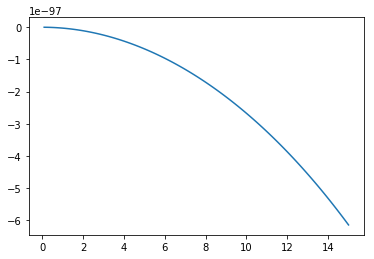

In [11]:
vel = np.array(Integral_d)
plt.plot(R,vel)

In [19]:
Integral_d = []
for i in range (0,len(R)):
    integrando = lambda z,x: V_c_d(x,z,R[i],z_p[i])
    result = integrate.dblquad(integrando,-10000.,10000.,lambda x: 0, lambda x: 10000.)[0]
    Integral_d.append(result)
print Integral_d

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
